In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [2]:
weather_df = pd.read_csv("data/weather_data.csv", parse_dates=["Date"])
columns_to_keep = list(weather_df.columns)
columns_to_keep.pop(0)
weather_df = weather_df.loc[weather_df["Township"] == "T024R01W5", columns_to_keep]
weather_df.head(3)

,Date,Air Temp. Min. (°C),Precip. (mm)
3499,2013-01-01,-8.54,0.0
3500,2013-01-02,-10.54,0.0
3501,2013-01-03,-7.53,0.0


In [3]:
weather_df = weather_df.set_index("Date")

In [4]:
weather_df.head(3)

,Air Temp. Min. (°C),Precip. (mm)
Date,,
2013-01-01,-8.54,0.0
2013-01-02,-10.54,0.0
2013-01-03,-7.53,0.0


In [5]:
shelter_df = pd.read_csv("data/2013-2022-emergency-shelter-occupancy-machine-readable.csv", parse_dates=["Date"])
# manually add the missing value for the Brenda House 2022-04-01 capacity
shelter_df.loc[(shelter_df["Date"] == "2022-04-01") & (shelter_df["ShelterName"] == "Brendas House"), "Capacity"] = 60
shelter_df.head(3)

C:\Users\HP\AppData\Local\Temp\ipykernel_12676\1626330343.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  shelter_df = pd.read_csv("data/2013-2022-emergency-shelter-occupancy-machine-readable.csv", parse_dates=["Date"])


,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
0,2013-04-01,Edmonton,Women Emergency,WEAC,WEAC,,75,65,,2013,4
1,2013-04-01,Edmonton,Intox,Hope Mission - Intox Centre,Hope Mission,Intox Centre,70,74,,2013,4
2,2013-04-01,Edmonton,Adult Emergency,Hope Mission - Herb Jamieson Centre,Hope Mission,Herb Jamieson Centre,250,253,,2013,4


In [91]:
shelter_df = shelter_df.loc[shelter_df["City"] == "Calgary", ["City", "Date", "ShelterName", "Capacity", "Overnight", "ShelterType"]]
# shelter_df["Capacity"].astype("int64")

In [92]:
shelter_df.head()

,City,Date,ShelterName,Capacity,Overnight,ShelterType
17,Calgary,2013-04-01,River Front,725,700,Adult Emergency
18,Calgary,2013-04-01,River Front - Winter Emergency,140,90,Winter Emergency
19,Calgary,2013-04-01,River Front - Short Term Supportive,270,262,Short Term Supportive
20,Calgary,2013-04-01,Hillhurst Centre,125,117,Adult Emergency
21,Calgary,2013-04-01,Wagner Centre,23,12,Adult Emergency


In [6]:
shelter_df["Capacity"] = shelter_df["Capacity"].astype("int32")

ValueError: invalid literal for int() with base 10: ' '

In [94]:
shelter_df.loc[shelter_df["Capacity"] == " "]

,City,Date,ShelterName,Capacity,Overnight,ShelterType


In [95]:
a = shelter_df.set_index("Date").loc[["2022-03-29", "2022-03-30", "2022-03-31", "2022-04-01", "2022-04-02", "2022-04-03"]]
a.loc[a["ShelterName"] == "Brendas House"]

,City,ShelterName,Capacity,Overnight,ShelterType
Date,,,,,
2022-03-29,Calgary,Brendas House,60,45,Family Emergency
2022-03-30,Calgary,Brendas House,60,50,Family Emergency
2022-03-31,Calgary,Brendas House,60,50,Family Emergency
2022-04-01,Calgary,Brendas House,60,45,Family Emergency
2022-04-02,Calgary,Brendas House,60,41,Family Emergency
2022-04-03,Calgary,Brendas House,60,41,Family Emergency


In [96]:
shelter_df["Overnight"] = shelter_df["Overnight"].astype("int32")

In [97]:
shelter_df.dtypes

City                   object
Date           datetime64[ns]
ShelterName            object
Capacity                int32
Overnight               int32
ShelterType            object
dtype: object

In [13]:
# shelter_df["occupancy_rate"] = shelter_df["Overnight"] / shelter_df["Capacity"]

In [14]:
# shelter_df.head(3)

In [15]:
shelter_df.head(3)

,City,Date,ShelterName,Capacity,Overnight
17,Calgary,2013-04-01,River Front,725,700
18,Calgary,2013-04-01,River Front - Winter Emergency,140,90
19,Calgary,2013-04-01,River Front - Short Term Supportive,270,262


In [16]:
shelter_df = shelter_df.groupby("Date").sum(["Capacity", "Overnight"])

In [17]:
shelter_df["occupancy_rate"] = shelter_df["Overnight"] / shelter_df["Capacity"]

In [18]:
shelter_df.head()

,Capacity,Overnight,occupancy_rate
Date,,,
2013-04-01,2575,2285,0.887379
2013-04-02,2575,2250,0.873786
2013-04-03,2575,2365,0.918447
2013-04-04,2575,2307,0.895922
2013-04-05,2575,2221,0.862524


In [19]:
joined_df = weather_df.join(shelter_df, how="inner")

In [20]:
joined_df.head()

,Air Temp. Min. (°C),Precip. (mm),Capacity,Overnight,occupancy_rate
Date,,,,,
2013-04-01,-4.31,0.00,2575,2285,0.887379
2013-04-02,-3.08,0.00,2575,2250,0.873786
2013-04-03,-0.96,0.22,2575,2365,0.918447
2013-04-04,-2.49,0.00,2575,2307,0.895922
2013-04-05,-3.17,0.00,2575,2221,0.862524


<AxesSubplot:xlabel='Air Temp. Min. (°C)', ylabel='occupancy_rate'>

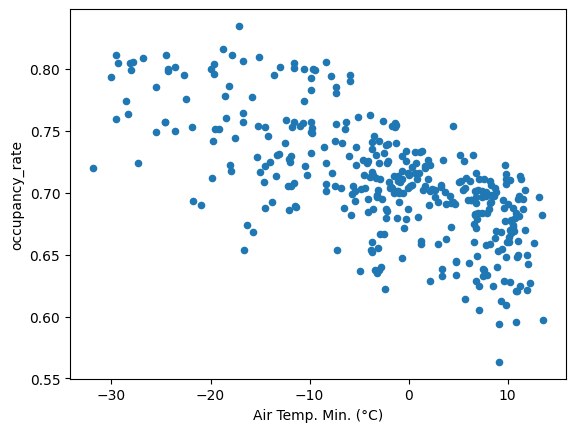

In [38]:
# joined_df["Air Temp. Min. (°C)"] = (joined_df["Air Temp. Min. (°C)"] - joined_df["Air Temp. Min. (°C)"].min()) / (joined_df["Air Temp. Min. (°C)"].max() - joined_df["Air Temp. Min. (°C)"].min())
# joined_df.loc[joined_df.index.dt.year == 2019, ["Air Temp. Min. (°C)", "occupancy_rate"]].plot()
weather_occupancy_2019 = joined_df.reset_index()
weather_occupancy_2019.loc[weather_occupancy_2019["Date"].dt.year == 2019, ["Air Temp. Min. (°C)", "occupancy_rate"]].plot(kind="scatter", x = "Air Temp. Min. (°C)", y = "occupancy_rate")

<AxesSubplot:xlabel='Precip. (mm)', ylabel='occupancy_rate'>

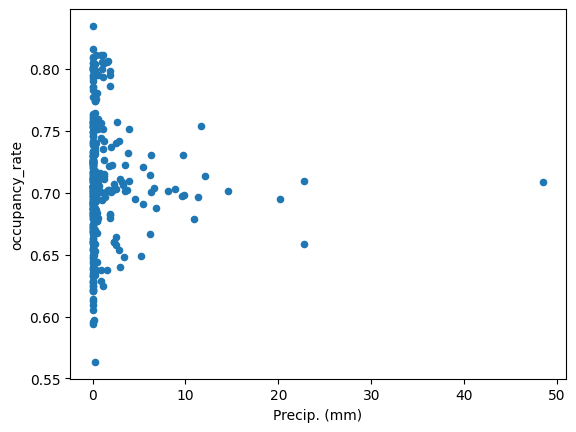

In [39]:
weather_occupancy_2019.loc[weather_occupancy_2019["Date"].dt.year == 2019, ["Precip. (mm)", "occupancy_rate"]].plot(kind="scatter", x = "Precip. (mm)", y = "occupancy_rate")

<AxesSubplot:xlabel='Precip. (mm)', ylabel='occupancy_rate'>

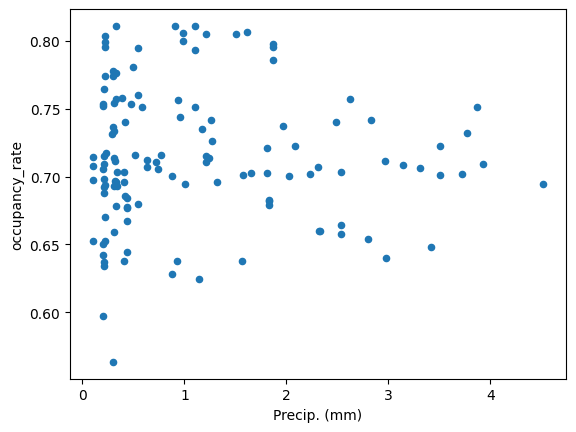

In [23]:
weather_occupancy_2019.loc[(weather_occupancy_2019["Date"].dt.year == 2019) & (weather_occupancy_2019["Precip. (mm)"] < 5) & (a["Precip. (mm)"] > 0), ["Precip. (mm)", "occupancy_rate"]].plot(kind="scatter", x = "Precip. (mm)", y = "occupancy_rate")

In [40]:
weather_occupancy_2019["prev_temp"] = weather_occupancy_2019["Air Temp. Min. (°C)"].shift(-1) - weather_occupancy_2019["Air Temp. Min. (°C)"].min() + 1
weather_occupancy_2019["temp_chain_index"] = (weather_occupancy_2019["Air Temp. Min. (°C)"] - weather_occupancy_2019["Air Temp. Min. (°C)"].min() + 1) / weather_occupancy_2019["prev_temp"]
weather_occupancy_2019["temp_chain_index"]

0       0.961646
1       0.937994
2       1.046846
3       1.021263
4       1.026975
          ...   
3372    0.964864
3373    0.962403
3374    1.008752
3375    1.004509
3376         NaN
Name: temp_chain_index, Length: 3377, dtype: float64

In [41]:
weather_occupancy_2019 = weather_occupancy_2019.loc[weather_occupancy_2019["Date"].dt.year == 2019]
weather_occupancy_2019 = weather_occupancy_2019.set_index(a["Date"])


In [36]:
a.head()

,Date,Air Temp. Min. (°C),Precip. (mm),Capacity,Overnight,occupancy_rate,prev_temp,temp_chain_index
Date,,,,,,,,
2019-01-01,2019-01-01,-11.77,0.2,2286,1722,0.753281,39.63,0.589957
2019-01-02,2019-01-02,4.48,0.0,2286,1724,0.754156,33.89,1.169371
2019-01-03,2019-01-03,-1.26,0.0,2286,1725,0.754593,28.84,1.175104
2019-01-04,2019-01-04,-6.31,0.0,2286,1731,0.757218,25.30,1.139921
2019-01-05,2019-01-05,-9.85,0.0,2286,1790,0.783027,27.80,0.910072


<AxesSubplot:xlabel='Date'>

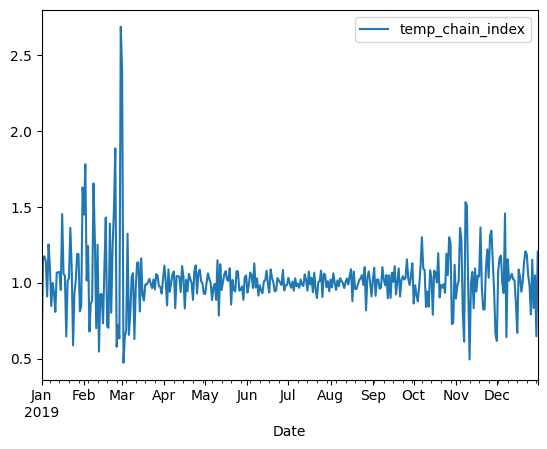

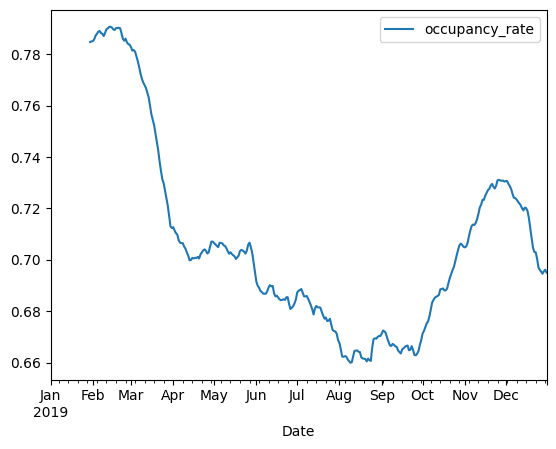

In [42]:
weather_occupancy_2019.loc[weather_occupancy_2019["Date"].dt.year == 2019, ["temp_chain_index"]].plot()
weather_occupancy_2019.loc[weather_occupancy_2019["Date"].dt.year == 2019, ["occupancy_rate"]].rolling(30).mean().plot()


Things to do:


* look into the shift between occupancy rate and temperature (days = 0, 1, 3, 7)

* create plots for 2021

* correlation coeff and regression line 

In [145]:
slopes = []
intercepts = []

for i in [0, 1, 3, 7]:
    weather_occupancy_2019[f"shift_{i}"] = weather_occupancy_2019["occupancy_rate"].shift(i)

    reg = linear_model.LinearRegression()
    reg.fit(
        np.array(weather_occupancy_2019["Air Temp. Min. (°C)"]).reshape(-1, 1)[i:], 
        weather_occupancy_2019[f"shift_{i}"][i:]
    )
    slopes.append(reg.coef_[0])
    intercepts.append(reg.intercept_)

Text(0.5, 0.98, 'Temperate vs. Occupancy')

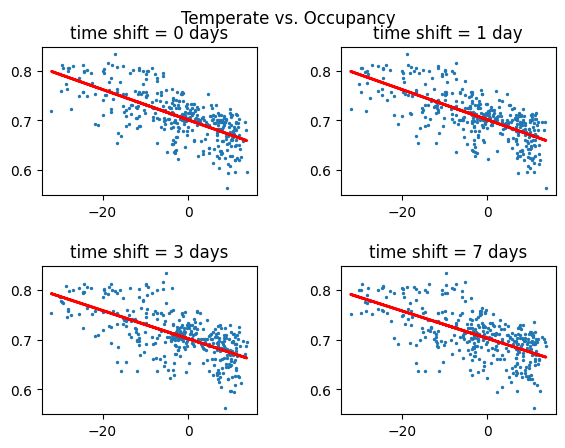

In [148]:
fig.suptitle("Temperate vs. Occupancy")
fig, ax = plt.subplots(2, 2)
fig.tight_layout(pad=3.0)

ax[0, 0].scatter(weather_occupancy_2019["Air Temp. Min. (°C)"], weather_occupancy_2019["shift_0"], s=2)
ax[0, 0].plot(
    weather_occupancy_2019["Air Temp. Min. (°C)"], 
    slopes[0] * weather_occupancy_2019["Air Temp. Min. (°C)"] + intercepts[0], 
    linewidth=2, 
    color="red"
)
ax[0, 0].set_title("time shift = 0 days")

ax[0, 1].plot(
    weather_occupancy_2019["Air Temp. Min. (°C)"], 
    slopes[1] * weather_occupancy_2019["Air Temp. Min. (°C)"] + intercepts[1], 
    linewidth=2, 
    color="red"
)
ax[0, 1].scatter(weather_occupancy_2019["Air Temp. Min. (°C)"], weather_occupancy_2019["shift_1"], s=2)
ax[0, 1].set_title("time shift = 1 day")

ax[1, 0].plot(
    weather_occupancy_2019["Air Temp. Min. (°C)"], 
    slopes[2] * weather_occupancy_2019["Air Temp. Min. (°C)"] + intercepts[2], 
    linewidth=2, 
    color="red"
)
ax[1, 0].scatter(weather_occupancy_2019["Air Temp. Min. (°C)"], weather_occupancy_2019["shift_3"], s=2)
ax[1, 0].set_title("time shift = 3 days")

ax[1, 1].plot(
    weather_occupancy_2019["Air Temp. Min. (°C)"], 
    slopes[3] * weather_occupancy_2019["Air Temp. Min. (°C)"] + intercepts[3], 
    linewidth=2, 
    color="red"
)
ax[1, 1].scatter(weather_occupancy_2019["Air Temp. Min. (°C)"], weather_occupancy_2019["shift_7"], s=2)
ax[1, 1].set_title("time shift = 7 days")

fig.suptitle("Temperate vs. Occupancy")

In [149]:
print(slopes)

[-0.0030582323458442978, -0.003053201891088058, -0.0028437335959610815, -0.0027757254004701043]


In [122]:
weather_occupancy_2019[["Air Temp. Min. (°C)", "occupancy_rate"]]

,Air Temp. Min. (°C),occupancy_rate
Date,,
2019-01-01,-11.77,0.753281
2019-01-02,4.48,0.754156
2019-01-03,-1.26,0.754593
2019-01-04,-6.31,0.757218
2019-01-05,-9.85,0.783027
...,...,...
2019-12-27,-11.36,0.688762
2019-12-28,-14.52,0.687884
2019-12-29,-10.43,0.721686


Text(0.5, 1.0, 'Tempreture vs. Occupancy Rate with a Regression line')

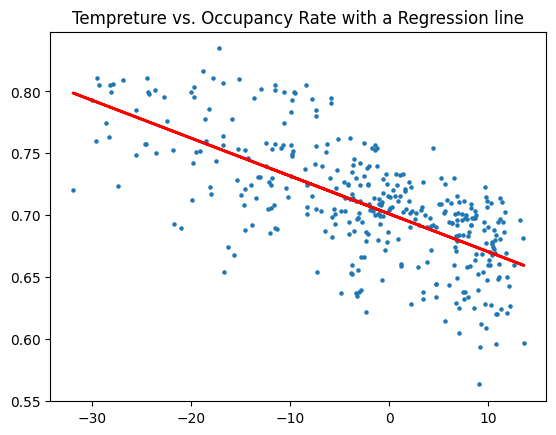

In [138]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(
    np.array(weather_occupancy_2019["Air Temp. Min. (°C)"]).reshape(-1, 1), 
    weather_occupancy_2019["occupancy_rate"]
)
slope = reg.coef_[0]
intercept = reg.intercept_

fig.suptitle("Temperate vs. Occupancy")
fig, ax = plt.subplots(1)

ax.plot(
    weather_occupancy_2019["Air Temp. Min. (°C)"], 
    slope * weather_occupancy_2019["Air Temp. Min. (°C)"] + intercept, 
    linewidth=2, 
    color="red"
)
ax.scatter(
    weather_occupancy_2019.loc[weather_occupancy_2019["Date"].dt.year == 2019, ["Air Temp. Min. (°C)"]], 
    weather_occupancy_2019.loc[weather_occupancy_2019["Date"].dt.year == 2019, ["occupancy_rate"]],
    s=5
)
ax.set_title("Tempreture vs. Occupancy Rate with a Regression line")

In [139]:
%history

import pandas as pd
import numpy as np

from datetime import datetime, timedelta
weather_df = pd.read_csv("data/weather_data.csv", parse_dates=["Date"])
columns_to_keep = list(weather_df.columns)
columns_to_keep.pop(0)
weather_df = weather_df.loc[weather_df["Township"] == "T024R01W5", columns_to_keep]
weather_df.head(3)
weather_df = weather_df.set_index("Date")
weather_df.head(3)
shelter_df = pd.read_csv("data/2013-2022-emergency-shelter-occupancy-machine-readable.csv", parse_dates=["Date"])
# manually add the missing value for the Brenda House 2022-04-01 capacity
shelter_df.loc[(shelter_df["Date"] == "2022-04-01") & (shelter_df["ShelterName"] == "Brendas House"), "Capacity"] = 60
shelter_df.head(3)
shelter_df = shelter_df.loc[shelter_df["City"] == "Calgary", ["City", "Date", "ShelterName", "Capacity", "Overnight"]]
# shelter_df["Capacity"].astype("int64")
shelter_df.head()
shelter_df["Capacity"] = shelter_df["Capacity"].astype("int32")
shelter_df.loc[shelter_df["Capacity"] == " "]
a =

In [150]:
shelter_df.head()

,City,Date,ShelterName,Capacity,Overnight,ShelterType
17,Calgary,2013-04-01,River Front,725,700,Adult Emergency
18,Calgary,2013-04-01,River Front - Winter Emergency,140,90,Winter Emergency
19,Calgary,2013-04-01,River Front - Short Term Supportive,270,262,Short Term Supportive
20,Calgary,2013-04-01,Hillhurst Centre,125,117,Adult Emergency
21,Calgary,2013-04-01,Wagner Centre,23,12,Adult Emergency


In [154]:
shelter_df["ShelterName"].unique()

array(['River Front', 'River Front - Winter Emergency',
       'River Front - Short Term Supportive', 'Hillhurst Centre',
       'Wagner Centre', 'Centre of Hope', 'Alpha House', 'Mustard Seed',
       'Calgary Dream Centre - Short Term Supportive', 'Calgary YWCA',
       'Calgary YWCA - Winter Emergency',
       'Calgary YWCA - Short Term Supportive',
       'Peter Coyle Place - Long Term Supportive',
       'Inn From the Cold - 3rd Floor', 'Brendas House',
       'Alpha House - Winter Emergency',
       'Mustard Seed - Winter Emergency',
       'Inn From the Cold - Winter Emergency', 'Inn From the Cold - KNOX',
       'Inn From the Cold - 2nd Floor',
       'Inn From the Cold - Scattered Sites', 'Alpha House - Clarion',
       'Alpha House - Main Site', 'Alpha House - Lakeview Hotel',
       'Riverfront - Combined', 'Telus Convention Centre',
       'Mustard Seed - First Alliance', 'Mustard Seed - Main Site',
       'River Front - Isolation', 'Alpha House Mustard Seed Acquisition',
 